In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P3_Decision Tree

/content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P3_Decision Tree


In [4]:
ls

CHDdata.csv  CHD_Data.csv  CHDdata.gsheet  Decision_Tree.ipynb  diabetes.png


In [5]:
import pandas as pd
col_names = ['Systolic BP', 'Tobacco', 'low-density lipoprotein', 'Adiposity', 'Famhist', 'typea', 'Obesity', 'Alcohol', 'Age', 'Chd']
# load dataset
CHD = pd.read_csv("CHD_Data.csv", header=None, names=col_names)

In [6]:
CHD.head()

,Systolic BP,Tobacco,low-density lipoprotein,Adiposity,Famhist,typea,Obesity,Alcohol,Age,Chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


**Feature Selection**
Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [7]:
CHD.drop('Famhist', inplace=True, axis=1)

In [8]:
CHD.head()

,Systolic BP,Tobacco,low-density lipoprotein,Adiposity,typea,Obesity,Alcohol,Age,Chd
1,160,12.00,5.73,23.11,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [9]:
#split dataset in features and target variable
feature_cols = ['Systolic BP', 'Tobacco', 'low-density lipoprotein', 'Adiposity', 'typea', 'Obesity', 'Alcohol', 'Age', ]
X = CHD[feature_cols] # Features
y = CHD.Chd # Target variable

**Splitting Data**
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). We need to pass 3 parameters features, target, and test_set size.

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

**Building Decision Tree Model**
Let's create a Decision Tree Model using Scikit-learn.

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluating Model**
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6896551724137931


Well, We got a classification rate of 68%, considered as good accuracy. We can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

> Indented block



**Visualizing Decision Trees**
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, We also need to install graphviz and pydotplus.

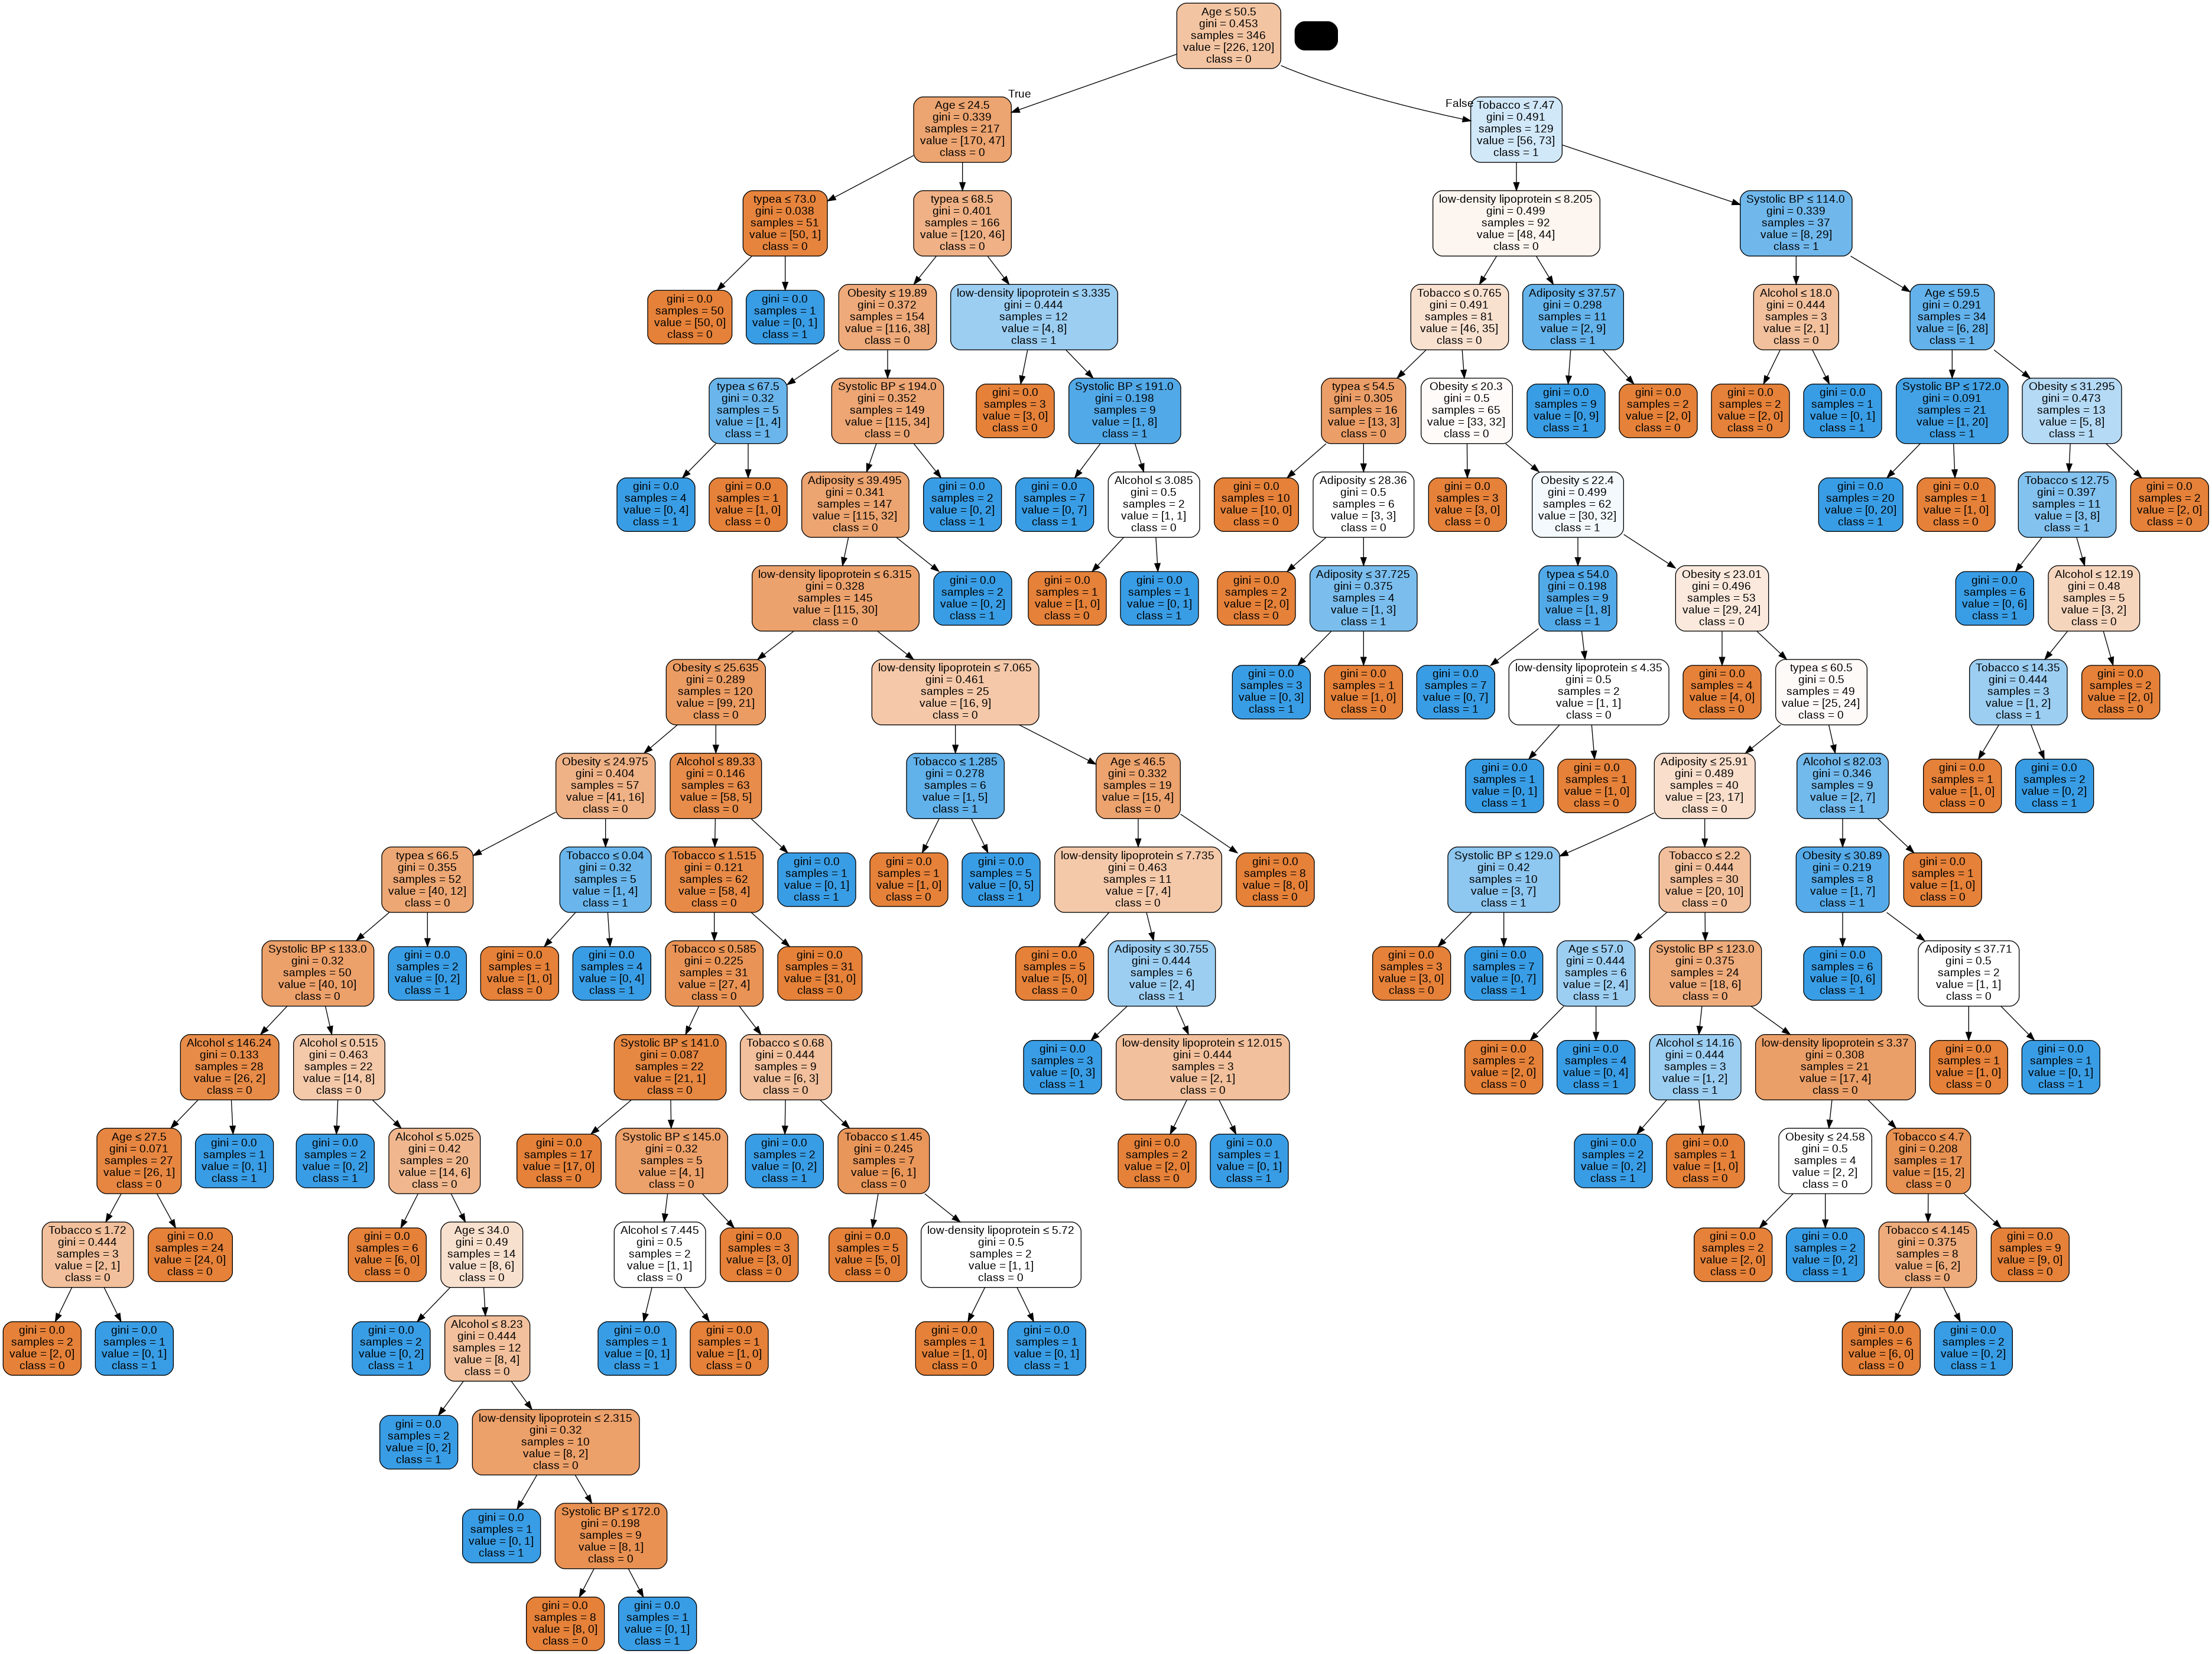

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

**Optimizing Decision Tree Performance**
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter :**string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth :** int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7068965517241379


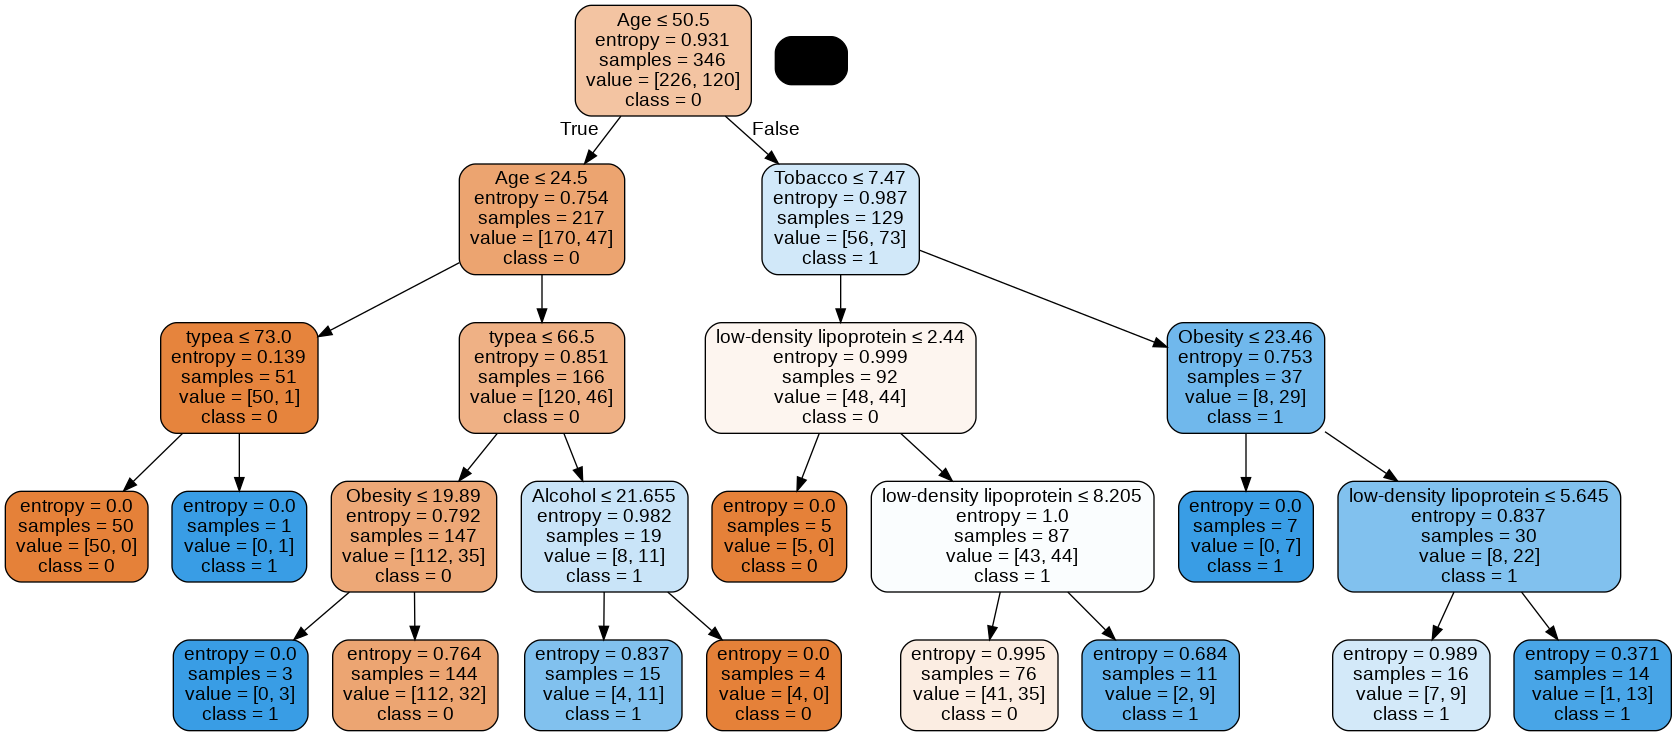

In [19]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**Conclusion**
Finally we were able to ovserve the performance of dataset using Decision Tree Algorithm. Attribute Selection Measures Information Gain Gain Ratio Gini index Optimizing Decision Tree Performance Classifier Building in Scikit-learn Pros and Cons Conclusion.